In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ourcodingclub/CC-time-series/master/monthly_milk.csv')


In [3]:
df

,month,milk_prod_per_cow_kg
0,1962-01-01,265.05
1,1962-02-01,252.45
2,1962-03-01,288.00
3,1962-04-01,295.20
4,1962-05-01,327.15
...,...,...
163,1975-08-01,386.10
164,1975-09-01,367.65
165,1975-10-01,372.15
166,1975-11-01,358.65


In [4]:
df.month


0      1962-01-01
1      1962-02-01
2      1962-03-01
3      1962-04-01
4      1962-05-01
          ...    
163    1975-08-01
164    1975-09-01
165    1975-10-01
166    1975-11-01
167    1975-12-01
Name: month, Length: 168, dtype: object

In [5]:
df.month = pd.to_datetime(df.month)

In [6]:
df.month

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
         ...    
163   1975-08-01
164   1975-09-01
165   1975-10-01
166   1975-11-01
167   1975-12-01
Name: month, Length: 168, dtype: datetime64[ns]

In [7]:
df = df.set_index('month') #To ignore the usual index and set date as the index
df.head()

,milk_prod_per_cow_kg
month,
1962-01-01,265.05
1962-02-01,252.45
1962-03-01,288.00
1962-04-01,295.20
1962-05-01,327.15


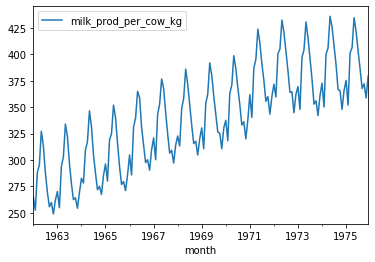

In [8]:
df.plot()

In [9]:
# To detrend, we use the detrend function from the scipy module
from scipy import signal

detrended = signal.detrend(df.milk_prod_per_cow_kg)

In [10]:
detrended

array([-10.96873415, -24.33041099,  10.45791218,  16.89623534,
        48.0845585 ,  33.82288167,   7.41120483, -11.80047201,
       -26.51214884, -23.22382568, -34.78550252, -22.49717935,
       -15.15885619, -31.22053303,   7.16779014,  15.4061133 ,
        45.69443647,  33.23275963,   7.27108279, -12.84059404,
       -28.90227088, -27.86394772, -38.52562455, -24.43730139,
       -11.69897823, -16.96065506,  13.7776681 ,  20.66599126,
        49.15431443,  33.09263759,   6.23096075, -12.08071608,
       -28.59239292, -26.20406976, -34.61574659, -17.37742343,
        -7.33910027, -24.3007771 ,  14.08754606,  19.17586923,
        45.41419239,  32.95251555,   7.89083872, -14.92083812,
       -32.78251496, -30.84419179, -40.15586863, -26.06754547,
        -7.9292223 , -27.59089914,  17.09742402,  24.88574719,
        49.32407035,  42.71239351,  13.60071668,  -4.26096016,
       -21.222637  , -19.28431383, -29.94599067, -11.35766751,
        -0.86934434, -22.33102118,  19.65730199,  28.79

In [11]:
detrended_df = pd.DataFrame(detrended)

In [12]:
detrended_df

,0
0,-10.968734
1,-24.330411
2,10.457912
3,16.896235
4,48.084559
...,...
163,-14.072059
164,-33.283735
165,-29.545412
166,-43.807089


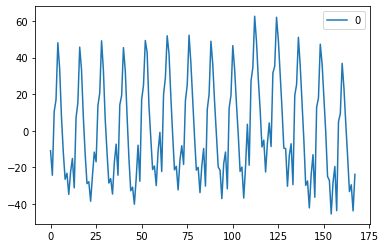

In [13]:
detrended_df.plot()

# Alternatively

In [ ]:
#import pandas as pd
#from scipy import signal

#df = pd.read_csv('https://raw.githubusercontent.com/ourcodingclub/CC-time-series/master/monthly_milk.csv')
##df.month = pd.to_datetime(df.month)
##df = df.set_index('month') #To ignore the usual index and set date as the index
#detrended = signal.detrend(df.milk_prod_per_cow_kg)
##df = pd.DataFrame(detrended)
#detrended_df = pd.DataFrame(detrended)
#df = df.set_index('month')
#df.head()
#detrended_df.plot()

In [14]:
pip install -U statsmodels

Requirement already up-to-date: statsmodels in ./.local/lib/python3.8/site-packages (0.13.2)
Note: you may need to restart the kernel to use updated packages.


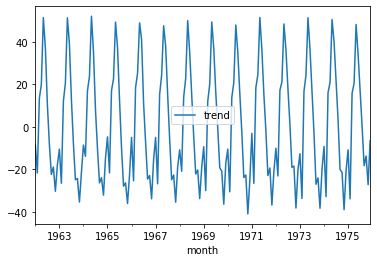

In [15]:
# To remove seasonal trends
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df.milk_prod_per_cow_kg, model='multiplicative', extrapolate_trend='freq')
detrended = df.milk_prod_per_cow_kg.values - res.trend

detrended_df = pd.DataFrame(detrended)
detrended_df.plot()

## Example 2

In [18]:
df_sales = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')

In [19]:
df_sales

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


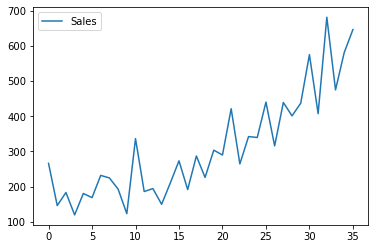

In [20]:
df.plot()

In [24]:
df.Month

0     1-01
1     1-02
2     1-03
3     1-04
4     1-05
5     1-06
6     1-07
7     1-08
8     1-09
9     1-10
10    1-11
11    1-12
12    2-01
13    2-02
14    2-03
15    2-04
16    2-05
17    2-06
18    2-07
19    2-08
20    2-09
21    2-10
22    2-11
23    2-12
24    3-01
25    3-02
26    3-03
27    3-04
28    3-05
29    3-06
30    3-07
31    3-08
32    3-09
33    3-10
34    3-11
35    3-12
Name: Month, dtype: object

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

- Time series is a sequence of observations recorded at regular time intervals.

  - Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. 
  - Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.
- Why even analyze a time series?

  - Because it is the preparatory step before you develop a forecast of the series.

  - Besides, time series forecasting has enormous commercial significance because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.

- So what does analyzing a time series involve?

  - Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.
  


In [27]:
pip install seaborn

     |████████████████████████████████| 292 kB 7.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [30]:
## Panel Data is a time based data that contains one or more related variables that are measured for the same time periods.

In [29]:
#Example
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


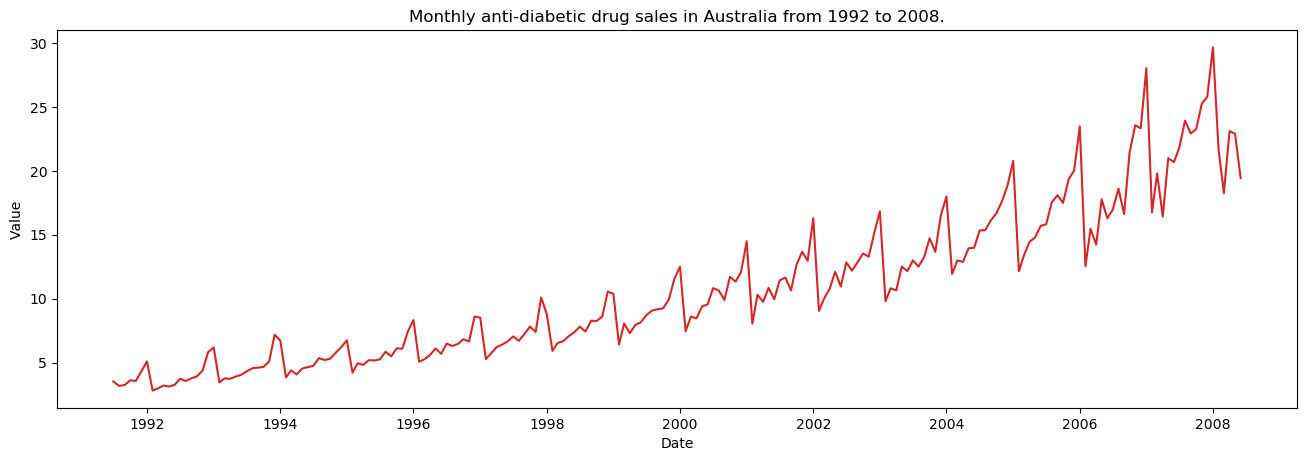

In [31]:
# To visualize our time series, we have to...
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

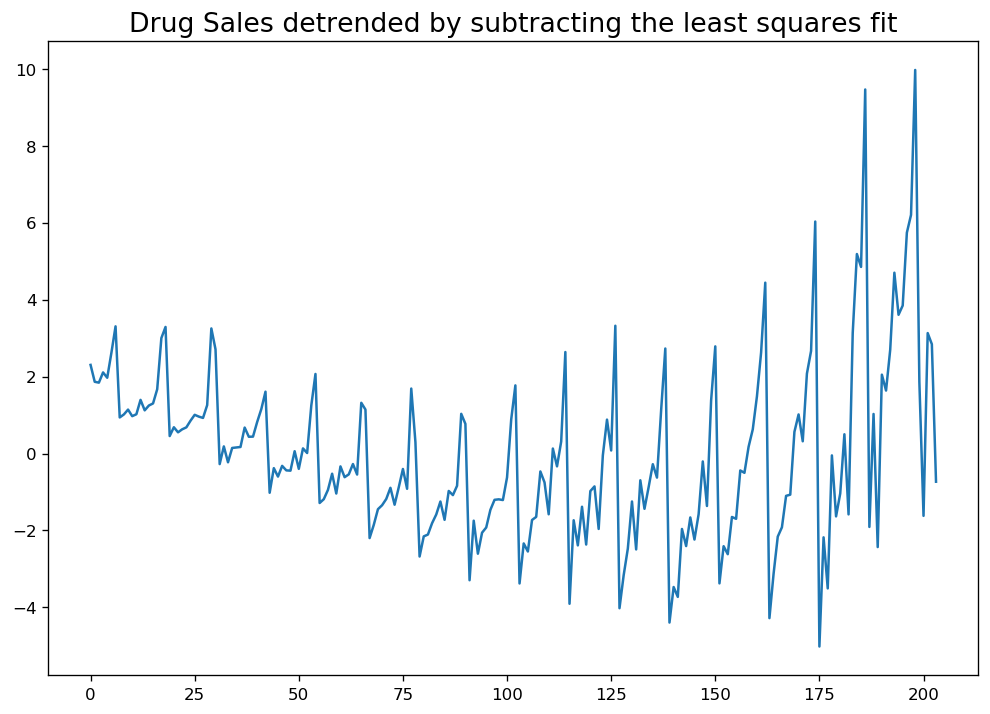

In [36]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

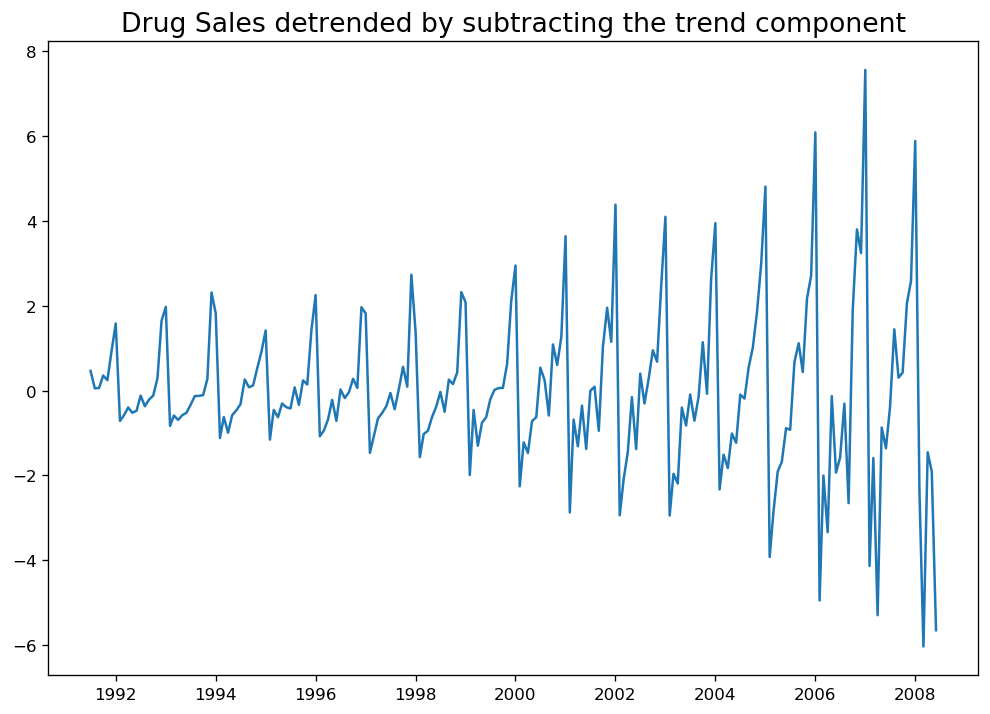

In [37]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

[]

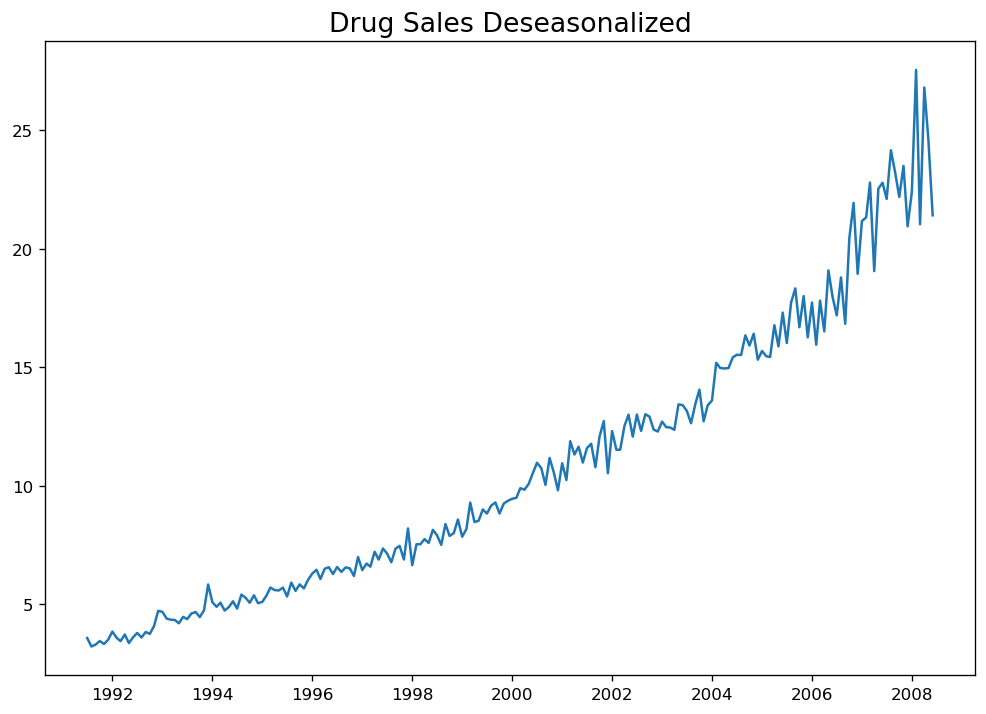

In [38]:
# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

## Seasonal Plot of a Time Series

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


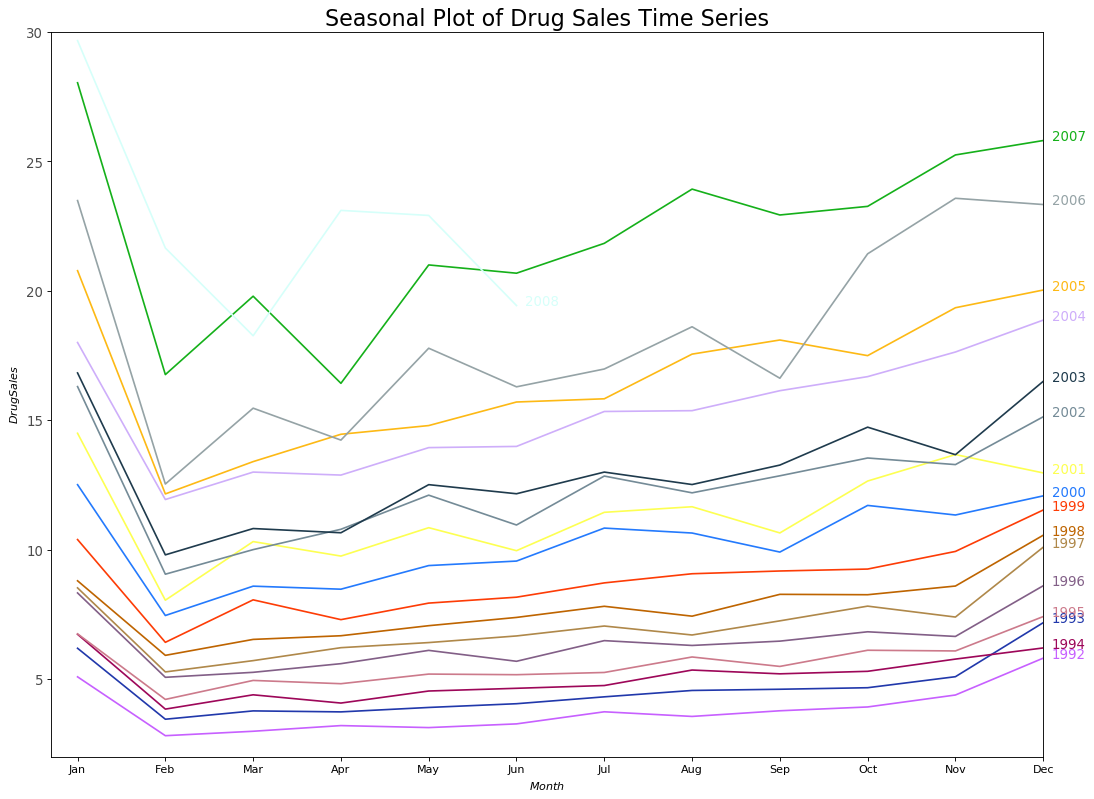

In [33]:
#Seasonal plot of a time series.

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()


- Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

- You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

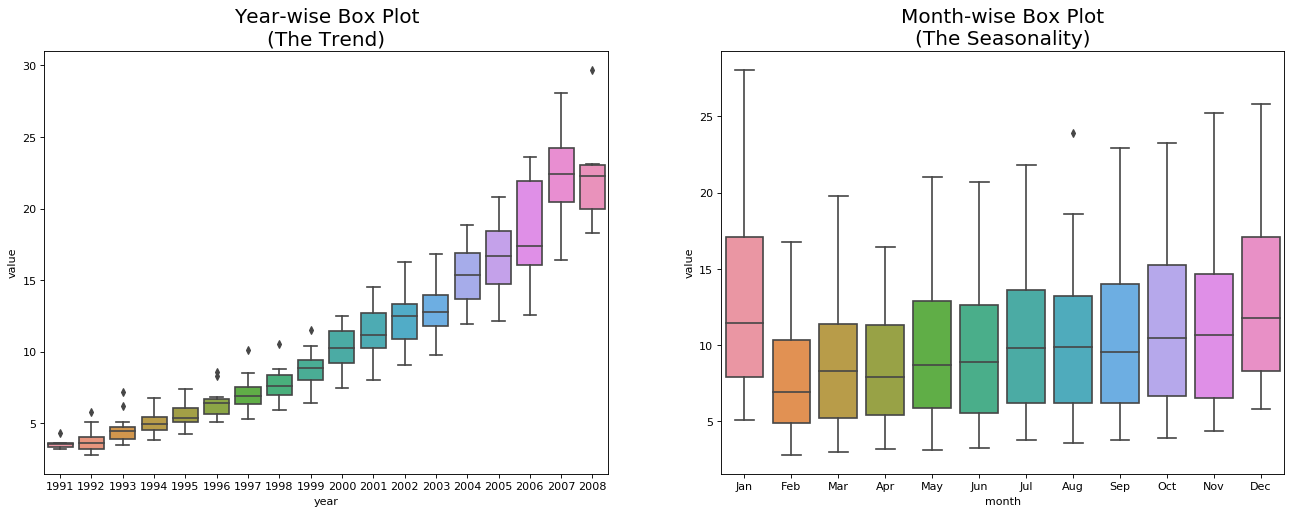

In [34]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

- Patterns in a time series
  - Any time series may be split into the following components: Base Level + Trend + Seasonality + Error
 
- A trend is observed when there is an increasing or decreasing slope observed in the time series. 
- Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors.
- It could be because of the month of the year, the day of the month, weekdays or even time of the day.

- However, It is not mandatory that all time series must have a trend and/or seasonality. 
- A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

  - So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

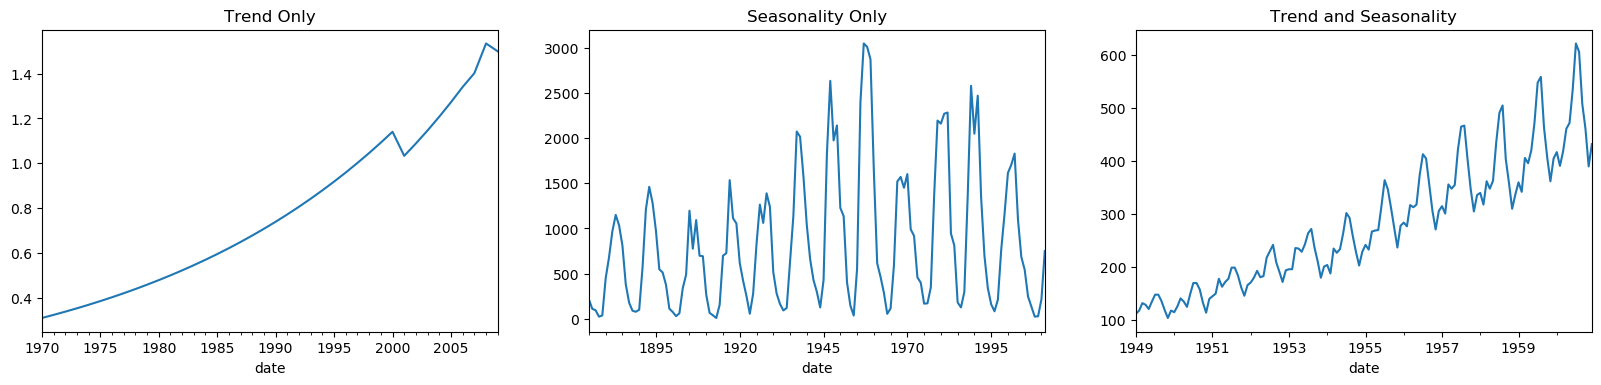

In [35]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', 
            parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', 
            parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', 
            parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])